# Coronary Heart Disease Analysis and Prediction

Analysis and Prediction done by **Mohammed Safi Ammar**

**Official Email: ugs17032_cse.mohammed@cbit.org.in**

**Personal Email: ammar.imran71@gmail.com**

#### About the dataset:

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,240 records and 15 attributes.


#### Table of Contents:

1. Data Overview
2. Exploratory Data Analysis
3. Feature Selection
4. Training and Testing Sets
5. Resampling Dataset
6. Modelling and Evaluation
7. Conclusion
8. Applying the Model

#### Objective: 

Build a classification model that predicts heart disease in a subject.

In [1]:
#importing basic modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Overview:

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Shape of the dataset:**

In [3]:
print('Total number of records:',df.shape[0],'\nNumber of Columns:',df.shape[1])

Total number of records: 4240 
Number of Columns: 16


- The dataset contains 4240 redords and 16 columns including the target column.

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

- There are **7 'int64'** and **9 'float64'** datatype attributes.

## 2. Exploratory Data Analysis:

- Handling missing and duplicate data.
- Univariate and Bivariate Analysis.
- Individual Features descriptive statistics.
- Visualizing Target attribute shows if the dataset is imbalanced.
- Feature Selection

**Handling Missing Data**

In [5]:
df.isnull().sum()
df[df.isna().any(axis=1)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


- Columns with null values are: 
    - education - **105**
    - cigsPerDay - **29**
    - BPMeds - **53**
    - totChol - **50**
    - BMI - **19**
    - heartRate - **1**
    - glucose - **388**

**Distributions using Histograms:**

C:\Users\ammar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026EC1716348>


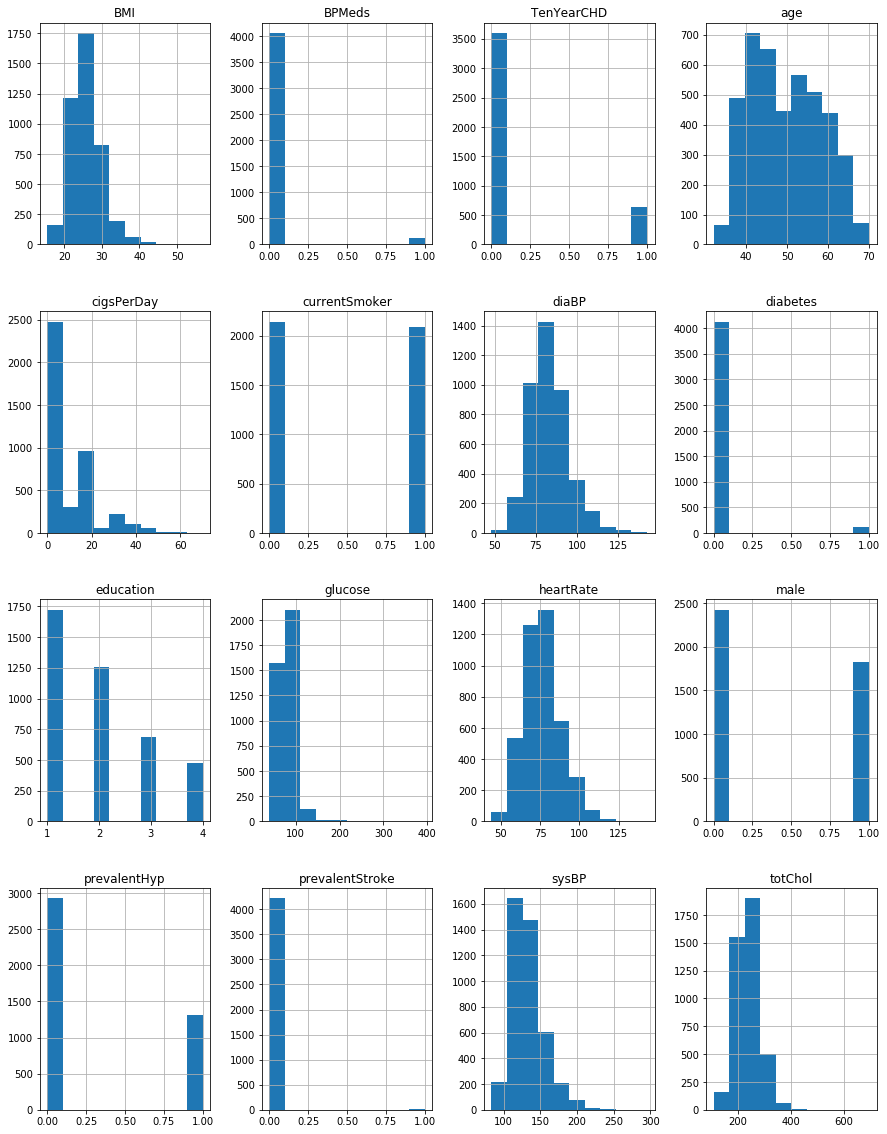

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
print(df.hist(ax = ax))

- BPMeds, currentSmoker, diabetes, male, prevalentHyp, and prevalentStroke are binary variable features of the dataset.

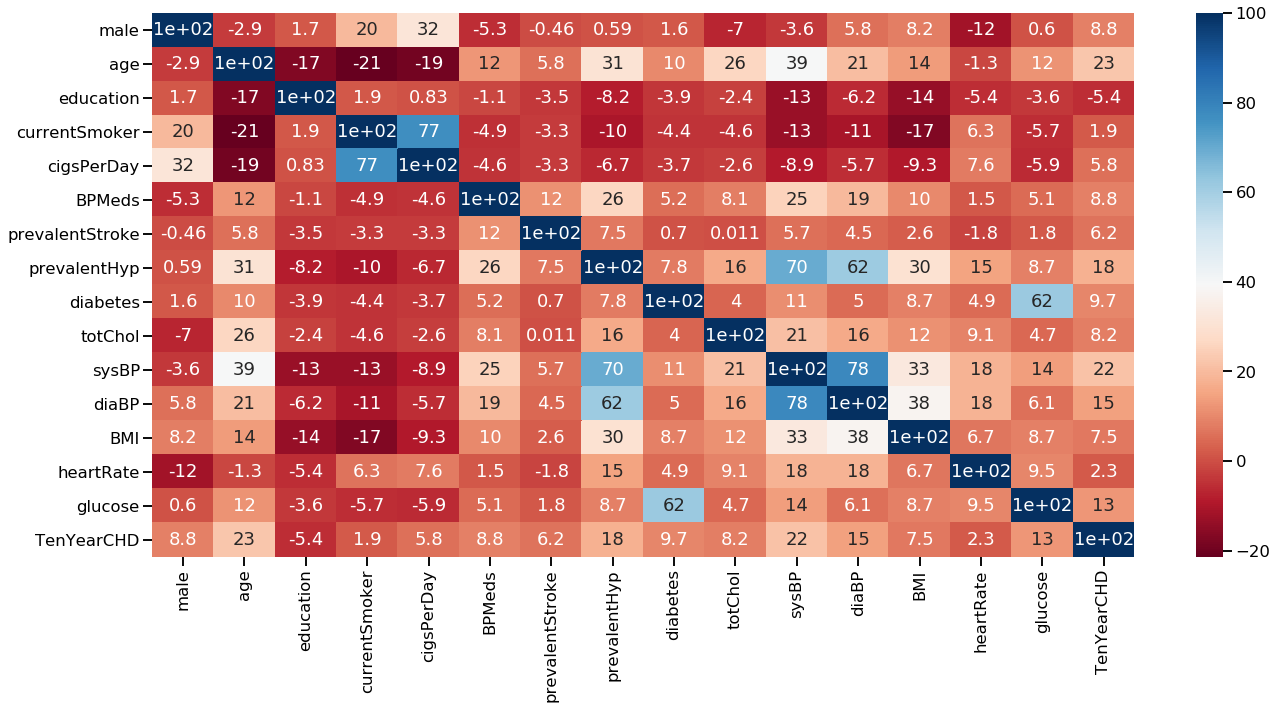

In [7]:
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='RdBu')

**Observations:**
The Pearson correlation between the attributes provides information to deduce if a feature is usefull or not.

- currentSmoker and cigsPerDay has a strong Correlation of 77.
- prevalentHyp vs sysBP / diaBP are having Positive Correlation of 70 and 62.
- glucose and diabetes are postively Correlated alongside sysBP and diaBP.

The column education will be dropped because it has a negative correlatio with the outcom variable 'TenYearCHD'. In practicality distinguishing between patients by using a feature such an education will be subjective and will not effect the prediction.

In [8]:
df = df.drop(['education'], axis=1)
#Dropped column education

**Checking for remaining Missing Data:**

In [9]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df = df.dropna()
print(df.isna().sum())
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

- The missing data has been handled and the column education has been removed.

**Checking for Duplicate Values:**

In [11]:
dup_df = df[df.duplicated()]
dup_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


- There are no duplicated values in any features, hence the dataset is free from duplicated values.

**Descriptive Statistics:**

In [12]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Continuos value features analysis:
- **Age** : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.
- **cigsPerDay** : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.
- **totChol** : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.
- **sysBP** : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.
- **diaBP** : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.
- **BMI** : Body Mass Index in our dataset ranges from 15.54 to 56.
- **heartRate** : Observed Heartrate in our case study is 44 to 143.
- **glucose** : Glucose sugar level range is 40 to 394.

**Distribution of Continuos Varibales:**

Text(0.5, 1.0, 'Distribution of HeartRate')

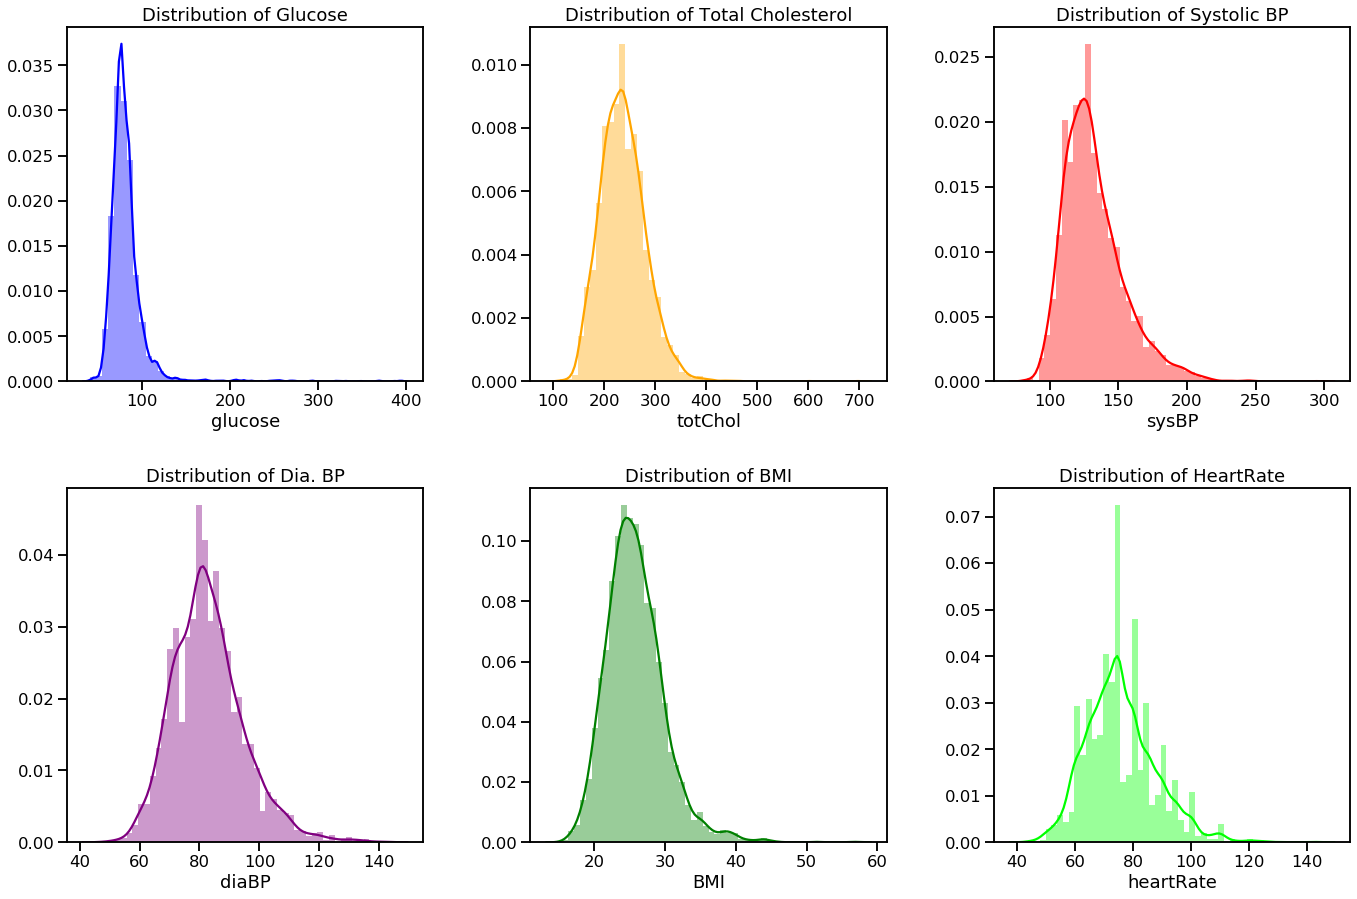

In [13]:
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='orange')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='g')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='lime')
plt.title('Distribution of HeartRate')

- **Glucose, Total Cholestrol, SysBP, and BMI** are right skewed.
- **DiaBP and HeartRate** are almost close to normal distibution.

**Outcome Variable by Gender:**

Text(0.5, 1, 'CHD by Gender')

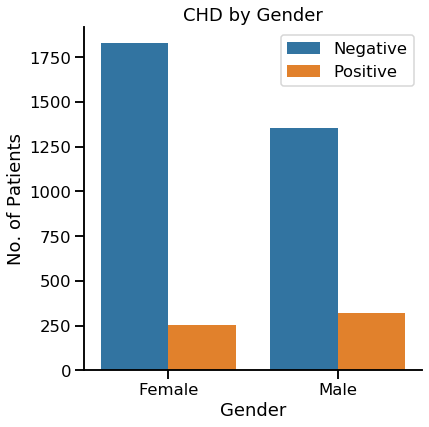

In [14]:
sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='tab10', height=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Negative', 'Positive'])
plt.title('CHD by Gender')

- This is a bivariate analysis graph which indicates whether a patient has tested positive or negative for a CHD.

- There are many more negative tested patients than positive.

- Approximately 80-90% are negative and around 10-15% are positive

Hence our dataset is Imbalanced.

**Distribution of patients Agewise:** 

Text(0.5, 1.0, 'Agewise distribution of the patients')

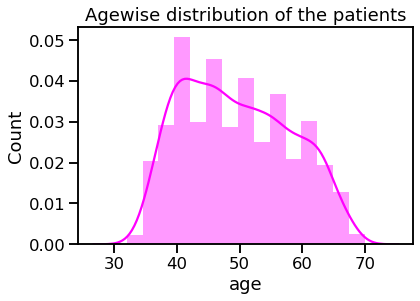

In [15]:
sns.distplot(df['age'], bins=15, kde=True, color='magenta')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

- The dominant age group of the test cases is 40-60 years.
- The peak test cases average at an age of 40 years.

In [16]:
#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    
#Heart Rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['enc_age'] = df['age'].apply(lambda x : encode_age(x))

- The above functions will encode Age and Heart Rate into two new columns for better analysis.

- The Age Group can be encoded Further :
    - Subject with **Age <= 40** are **Adults.**
    - Subject with **Age > 40 and <= 55** are **Middle-Aged Adult.**
    - Subject **Above 55** will fall in **Senior** Category.


- HeartRate can be encoded as follows:
    - HeartRate **<= 60** is **Low / Resting** HeartBeat.
    - HeartRate **between 60 to 100** is considered as **Normal.**
    - While, HeartRate **above 100** is **High.**

**HeartRate and Age groups count:**

Text(0.5, 1.0, 'Count by Age Group')

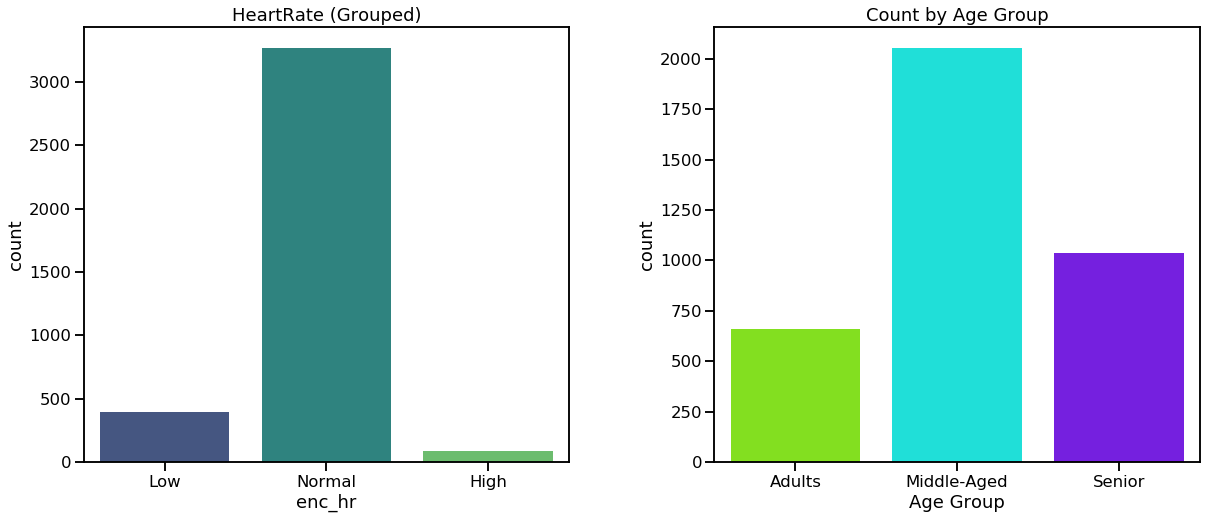

In [17]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(df['enc_hr'], palette='viridis')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(1, 2, 2)
sns.countplot(df['enc_age'], palette='hsv')
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

**Multivariate Analysis:**

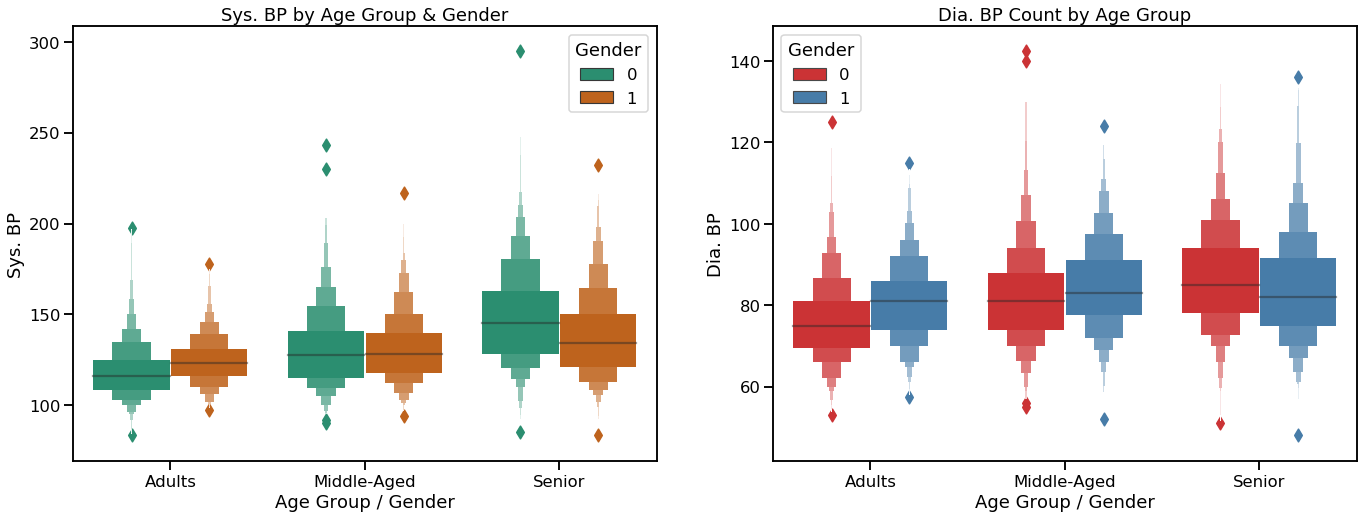

In [18]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='enc_age', y='sysBP', hue='male', data=df, palette='Dark2')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='enc_age', y='diaBP', hue='male', data=df, palette='Set1')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

- **Sys. BP by Age Group & Gender** : Sys. BP is Increasing by Age Group and Gender.


- **Dia. BP by Age Group & Gender** : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

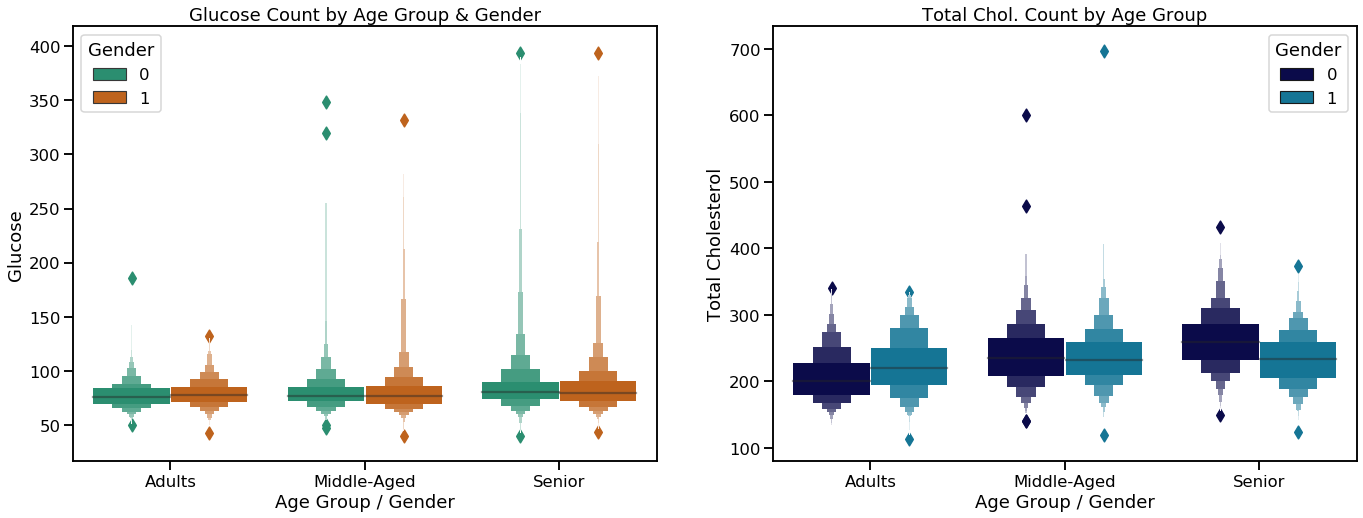

In [19]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='enc_age', y='glucose', hue='male', data=df, palette='Dark2')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='enc_age', y='totChol', hue='male', data=df, palette='ocean')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

- **Glucose Count by Age Group & Gender** : As Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.


- **Total Cholesterol by Age Group & Gender** : Excluding Outliers, Observation is clear that for females Cholesterol level is increasing by Age. While, for Males the cholesterol level is approximately similar for each Age Group.

**CigsPerDay by age group:**

Text(0.5, 1, 'Cigs. per day by Age Group')

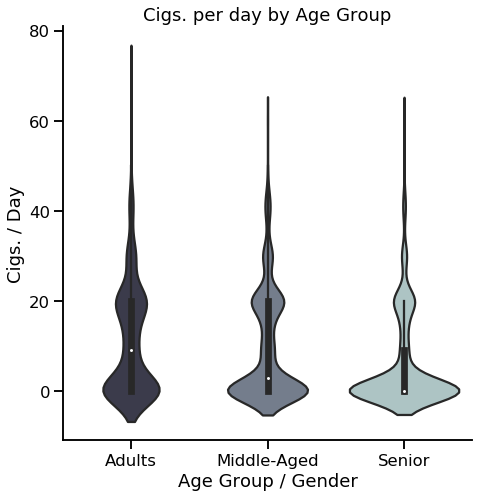

In [20]:
sns.catplot(data=df, x='enc_age', y='cigsPerDay', kind='violin', height=7, palette='bone')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

- **Adults** : In Adults it is observed that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.


- **Middle-Aged** : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.


- **Senior** : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

**Diabetes by age group:**

Text(0.5, 1, 'Diabetes by Age Group')

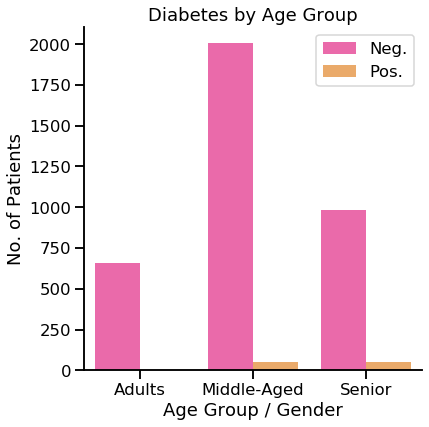

In [21]:
sns.catplot(x='enc_age', hue='diabetes', data=df, kind='count', palette='spring', height=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

- **Adults** : Subject with Negative Diabetes Diagnosis are approximately 700 in count while Positive Diabetes Diagnosis is Almost Nill.


- **Middle-Aged** : Subject with Negative Diabetes Diagnosis are reaching the peak of approximately 2000 Count while Positive Count is Under 100.


- **Senior** : Subject diagnosed Negative are approximately 1000 while Positive Count is Under 100.

**Target Variable Count:**

Text(0.5, 1.0, 'Target Class Count')

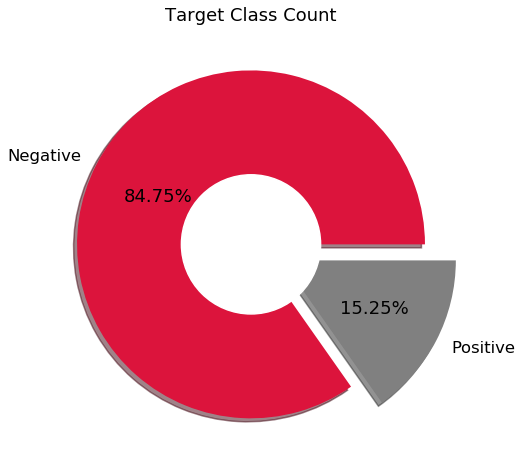

In [22]:
plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Negative','Positive'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gray'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

- The dataset is imbalanced here having ratio of 85:15 where positive class is minor.


In [23]:
df.drop(['enc_age','enc_hr'], axis=1, inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 3. Feature Selection:

- Using sklearn library the most important features for the outcome variable can be identified and unwanted features can be eliminated.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [25]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.109932
13,glucose,402.409837
1,age,297.974980
8,totChol,252.958627
3,cigsPerDay,185.115196
10,diaBP,142.920436
6,prevalentHyp,82.342164
7,diabetes,31.711253
4,BPMeds,26.116583
0,male,19.178560


- By using the SelectKBest feature slection function from sklearn, the best features are displayed in order.

**Visualization of Feature Selection:**

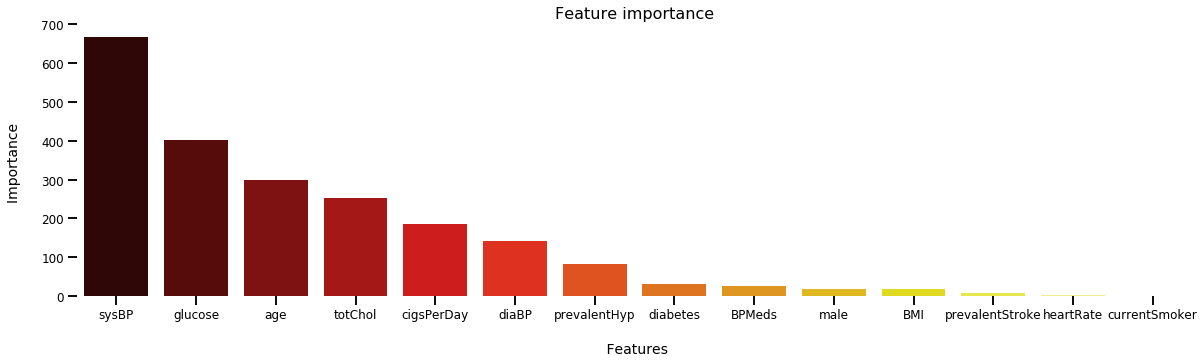

In [26]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "hot")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

These are the 10 best features that can be used to predict the output variable:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

The columns removed are:
- **Education:** Due to irrelevance to outcome variable and being out of subject.
- **CurrentSmoker:** Due to presence of a more informative similar variable(CigsPerDay).
- **PrevalentStroke:** Due to high imbalance caused by this variable.
- **BMI:** Due to unimpactful effect on outcome variable.
- **HeartRate:** Due to the prediction made by sklearn algorithm.

In [28]:
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


- A new dataset with the most important features is created.

**Final Correlation Check:**

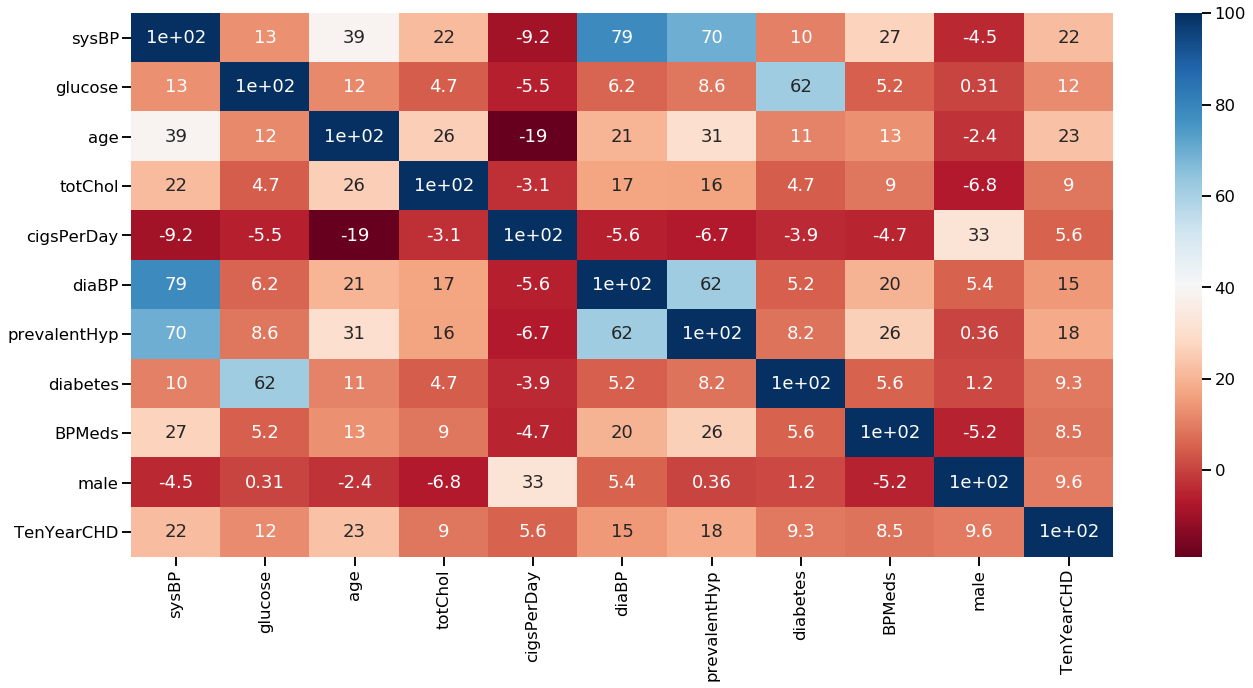

In [29]:
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='RdBu')

- In this correlation we can observe that almost all features have a strong correlation to the output variable.

**Checking for Outliers:**

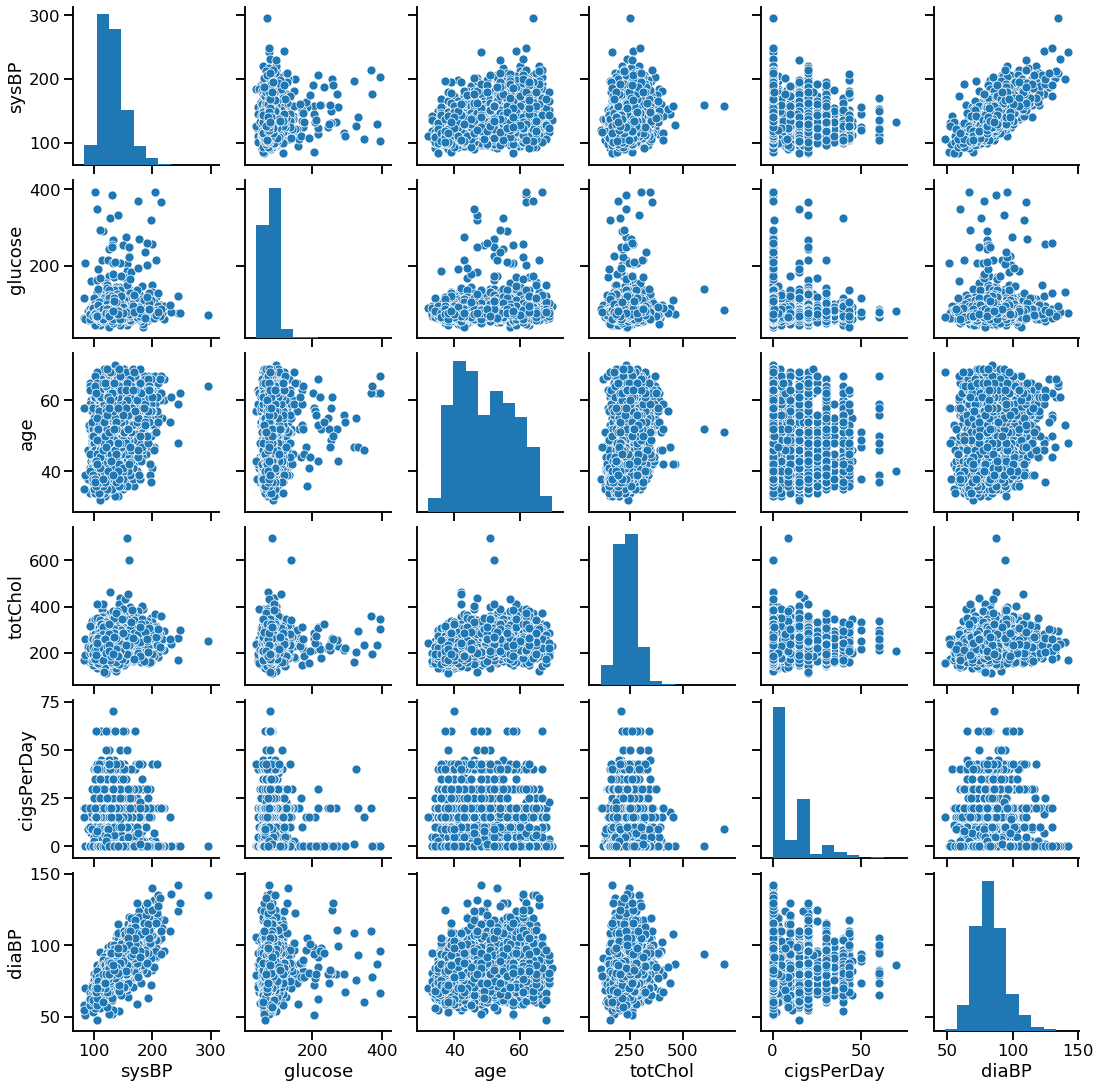

In [30]:
sns.pairplot(
    df,
    palette='Wistia',
    x_vars=["sysBP", "glucose", "age", "totChol", "cigsPerDay", "diaBP"],
    y_vars=["sysBP", "glucose", "age", "totChol", "cigsPerDay", "diaBP"]
)

- The most notable and unwanted outliers are in totChol column only.

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9.0,87.0,1,0,0.0,1,0


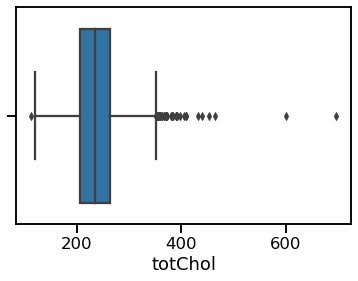

In [31]:
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

- From the above graph and table it is clear that the two outliers have totChol value 600 and 696 respectively.

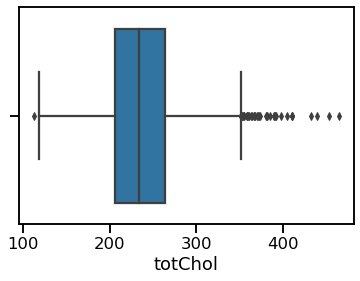

In [32]:
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

- The two outliers are dropped and a much more uniform graph is obtained.

In [33]:
df_clean = df

In [34]:
#Importing important sklearn libraries.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Feature Scaling:

- Feature scaling is necessary to try different models. Each column value will be scaled to between 0 and 1.
- This will help evaluate the models more uniformly.

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.230991,0.118260,0.462432,0.352447,0.128728,0.369677,0.311550,0.026941,0.030408,0.445185,0.152307
std,0.104228,0.067429,0.225589,0.124179,0.170391,0.126290,0.463189,0.161931,0.171730,0.497053,0.359366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.430199,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- All the values are now scaled to exist between 0 and 1 only and hence can be evaluated more uniformly.

## 4. Training and Testing Sets:

In [36]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

- The X train and test tables contain all the features and their values.
- The y train and test tables contain all the standalone features without their values.

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2249, 10), (1500, 10), (2249,), (1500,))

- As observed, there are 2249 rows in the training set, i.e. 60% of the data is used for training and 1500 rows for testing, i.e. 40% of the data.
- There are total of 3749 rows in the dataset after data cleansing  and feeature selection.

## 5. Resampling Dataset:

- As shown in the target variable count, the ratio of outcome variable is 85:15 which is imbalanced.
- If the dataset is not balanced int terms of the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like the algorithm is achieving satisfactory results when, in reality, it is always predicting the majority class.

### Undersampling:

- Undersampling is a technique used to decrease the number of instances from the overrepresented class in the data set.

- Since the ratio of our outcome variable is 85:15, this method will decrease the number of unwanted transactions in the data to approximately 50:50.

- This method will select observations from the majority class randomly and remove them from the dataset until we achieve a balance between the majority and minority classes.

In [38]:
df_chd0 = df.loc[df['TenYearCHD'] == 0]
df_chd1 = df.loc[df['TenYearCHD'] == 1]
len(df_chd0),len(df_chd1)

(3178, 571)

- The majority of outcome variables are non-CHD and 3178 in number.
- To get the ratio closer to 50:50, the data will be undersampled to 607 observations.

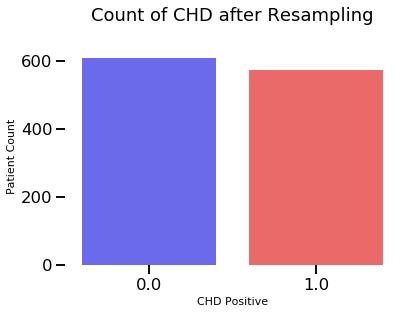

0.0    607
1.0    571
Name: TenYearCHD, dtype: int64

In [39]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)

CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=607,random_state=42)

normalized_df = pd.concat([CHD_df, non_CHD_df])

sns.countplot(normalized_df.TenYearCHD, palette="seismic")
plt.box(False)
plt.xlabel('CHD Positive',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count of CHD after Resampling\n')
plt.show()
normalized_df.TenYearCHD.value_counts()

- The total number of non CHD cases is resampled to 607 from 3178.
- The dataset is balanced and modelling and evaluation can be carried out.

In [40]:
#Updating the training sets
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

## 6. Modelling and Evaluation:

There are 4 modelling techniques used in this project:
- Logistic Regression
- Support Vector Machine
- Decision Tree
- KNN

Four evaluation variables and a matrix are used to compare the models:
- **F1 score:** Can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
- **Accuracy:** How often a classifier is correct. Equal to (True Pos + True Neg)/total
- **Precision:** How often a prediction is correct. Equal to (True Positive/False Positive + True Positive) 
- **Recall:** True Positive Rate (Recall)= (True Positive/False Negative + True Positive)
- **Confusion Matrix:** Provides specific table layout of True Positive, True Negative, False Positive, and False Negative, a general visualization of the performance of a model.

### 1. Logistic Regression

In [41]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)
normalized_df_reg_pred = normalized_df_reg.predict(X_test)

f1 = f1_score(y_test, normalized_df_reg_pred)
f1lr = round(f1,3)
print(f"The f1 score for Logistic Regression is: {round(f1,3)}")

acc = accuracy_score(y_test, normalized_df_reg_pred)
acclr = round(acc,3)
print(f"The accuracy score for Logistic Regression is: {round(acc,3)}")

precision = precision_score(y_test, normalized_df_reg_pred)
precisionlr = round(precision,3)
print(f"The precision score for Logistic Regression is: {round(precision,3)}")

recall = recall_score(y_test, normalized_df_reg_pred)
recalllr = round(recall,3)
print(f"The recall score for Logistic Regression is: {round(recall,3)}")


The f1 score for Logistic Regression is: 0.386
The accuracy score for Logistic Regression is: 0.677
The precision score for Logistic Regression is: 0.273
The recall score for Logistic Regression is: 0.655


**Confusion Matrix:**

Text(0.5, 1.1, 'Logistic Regression Confusion Matrix\n')

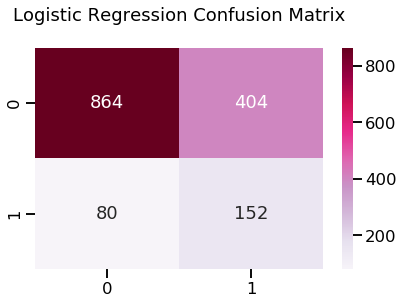

In [42]:
cnf_matrix_logreg = confusion_matrix(y_test, normalized_df_reg_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True,cmap="PuRd" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix\n', y=1.1)

- False Positive and False Negative values comprise almost 27%, 5.3% of the total testing dataset respectively which concludes logistic regression technique for this dataset to be average reliable.

### 2. Support Vector Machine

- Though not necessary, it adds more variety to compare models with.

In [43]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)

f1 = f1_score(y_test, normalized_df_svm_pred)
f1svm = round(f1,3)
print(f"The f1 score for SVM is: {round(f1,3)}")

acc = accuracy_score(y_test, normalized_df_svm_pred)
accsvm = round(acc,3)
print(f"The accuracy score for SVM is: {round(acc,3)}")

precision = precision_score(y_test, normalized_df_svm_pred)
precisionsvm = round(precision,3)
print(f"The precision score for SVM is: {round(precision,3)}")

recall = recall_score(y_test, normalized_df_svm_pred)
recallsvm = round(recall,3)
print(f"The recall score for SVM is: {round(recall,3)}")

The f1 score for SVM is: 0.383
The accuracy score for SVM is: 0.661
The precision score for SVM is: 0.266
The recall score for SVM is: 0.681


**Confusion Matrix:**

Text(0.5, 1.1, 'SVM Confusion Matrix \n')

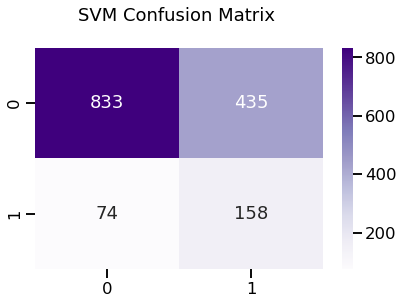

In [44]:
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Purples" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM Confusion Matrix \n', y=1.1)

- False Positive and False Negative values comprise almost 29%, 4.9% of the total testing dataset respectively which concludes Support Vector Machine technique for this dataset to be almost similar to logistic regression and average reliable.

### 3. Decision Tree

In [45]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)
normalized_df_dtc_pred = dtc_up.predict(X_test)

f1 = f1_score(y_test, normalized_df_dtc_pred)
f1dt = round(f1,3)
print(f"The f1 score for DTC is: {round(f1,3)}")

acc = accuracy_score(y_test, normalized_df_dtc_pred)
accdt = round(acc,3)
print(f"The accuracy score for DTC is: {round(acc,3)}")

precision = precision_score(y_test, normalized_df_dtc_pred)
precisiondt = round(precision,3)
print(f"The precision score for DTC is: {round(precision,3)}")

recall = recall_score(y_test, normalized_df_dtc_pred)
recalldt = round(recall,3)
print(f"The recall score for DTC is: {round(recall,3)}")

The f1 score for DTC is: 0.518
The accuracy score for DTC is: 0.712
The precision score for DTC is: 0.349
The recall score for DTC is: 1.0


**Confusion Matrix:**

Text(0.5, 1.1, 'Decision Tree Confusion Matrix\n')

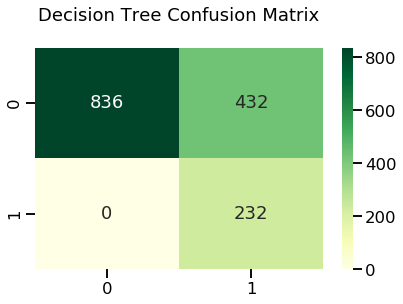

In [46]:
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="YlGn" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree Confusion Matrix\n', y=1.1)

- The False Positive quadrant comprises almost 29.67% of the total testing dataset. The False Negative quadrant brings a score of 0%, the precision score of this model is higher compared to others and hence Decision Tree is more reliable than Support vector Machine and Logistic Regression.

### 4. KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)

f1 = f1_score(y_test, normalized_df_knn_pred)
f1knn = round(f1,3)
print(f"The f1 score for KNN is: {round(f1,3)}")

acc = accuracy_score(y_test, normalized_df_knn_pred)
accknn = round(acc,3)
print(f"The accuracy score for KNN is: {round(acc,3)}")

precision = precision_score(y_test, normalized_df_knn_pred)
precisionknn = round(precision,3)
print(f"The precision score for KNN is: {round(precision,3)}")

recall = recall_score(y_test, normalized_df_knn_pred)
recallknn = round(recall,3)
print(f"The recall score for KNN is: {round(recall,3)}")

The f1 score for KNN is: 0.46
The accuracy score for KNN is: 0.798
The precision score for KNN is: 0.392
The recall score for KNN is: 0.556


**Confusion Matrix:**

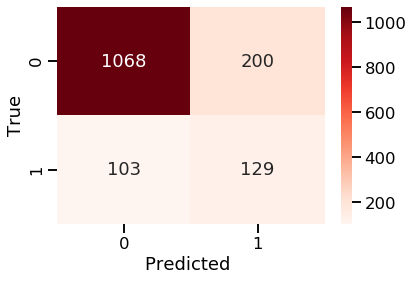

In [48]:
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)
ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

- The False Positive quadrant comprises almost 13.33% of the total testing dataset. The False Negative quadrant brings a score of 6.86%, the accuracy of this model is nearly 80% which is highest compared to others and hence KNN Model is most reliable than all other models.

## 7. Conclusion:

Adding all the resultant values to a table for side by side analysis.

In [49]:
result = [(f1lr,acclr,precisionlr,recalllr),(f1svm,accsvm,precisionsvm,recallsvm),(f1dt,accdt,precisiondt,recalldt),(f1knn,accknn,precisionknn,recallknn)]
rdf = pd.DataFrame(data = result, columns = ['f1','Accuracy','Precision','Recall'], index = ['Logistic Regression','Support Vector Machine','Decision Tree','KNN'])
rdf

,f1,Accuracy,Precision,Recall
Logistic Regression,0.386,0.677,0.273,0.655
Support Vector Machine,0.383,0.661,0.266,0.681
Decision Tree,0.518,0.712,0.349,1.000
KNN,0.460,0.798,0.392,0.556


- The highest f1 value(0.516) is given by the **Decision Tree** model.
- The maximum Accuracy(0.798) is given by the **KNN** model.
- The highest Precision value(0.392) is given by the **KNN** model.
- The highest Recall value(1) is given by the **Decision Tree** model.


The highest f1 score is given by decision tree because of its ability to test the dataset with a recall value of 1. Since the f1 score depends on the recall value aswell as precision, the Decision tree produces the highest f1 score.

**Since accuracy is the most important attribute of a machine learning model, the KNN model fits best for this dataset.**





### **Cross Validation of KNN model:**

Cross Validation is used to assess the predictive performance of the models and to judge how they perform outside the sample to a new data set.

In [50]:
cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of KNN model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.83866667 0.83466667 0.83866667 0.84266667 0.8317757 ]
The Accuracy of KNN model with Cross Validation is: 83.73%


## 8. Applying the KNN Model:

In [51]:
def get_info():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Patient Information:')
    
    age = input("Age: ") 
    my_predictors.append(age)
    male = input("Gender; male=1, female=0: ") 
    my_predictors.append(male)
    cigsPerDay = input("Smoked cigarettes per day: ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Systolic blood pressure: ") 
    my_predictors.append(sysBP)
    diaBP = input("Diastolic blood pressure: ")
    my_predictors.append(diaBP)
    totChol = input("Cholesterin level: ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0:  ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0:  ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0:  ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient is likely to develop a Coronary Heart Disease.")
    if my_y_pred == 0:
        print("The patient is unlikely to develop a Coronary Heart Disease.")
        
get_info()

Patient Information:
Age: 21
Gender; male=1, female=0: 0
Smoked cigarettes per day: 4
Systolic blood pressure: 106
Diastolic blood pressure: 70
Cholesterin level: 195
Was Patient hypertensive? Yes=1, No=0:  1
Did Patient have diabetes? Yes=1, No=0:  0
What is the Patient's glucose level? 80
Has Patient been on Blood Pressure Medication? Yes=1, No=0:  0


Result:
The patient is likely to develop a Coronary Heart Disease.
